In [1]:
import pandas as pd
import numpy as np
import gc

from scipy import stats
from matplotlib import pyplot as plt
from collections import Counter

In [2]:
def csv_read(p_path,header_is=0):
    pd_data=pd.read_csv(p_path, sep=',',header=header_is)
    column_names=pd_data.columns.values.tolist()
    print(column_names)
    return pd_data,np.array(pd_data),column_names

#-------------------------------------------------------------------------------------
def write_to_csv(p_data,p_path):
    dataframe = pd.DataFrame(p_data)
    dataframe.to_csv(p_path, mode='a',header=False,index=False,sep=',')
    del dataframe
    gc.collect()
    
#-------------------------------------------------------------------------------------
def bar_figure(group1,group2,y_label):
    figure,axes=plt.subplots()
    
    axes.boxplot([group1,group2],patch_artist=True)
    plt.xticks(range(1,3),['Group 1','Group 2'])
    #plt.yticks(fontsize = 20)
    
    min_end=min(np.min(group1),np.min(group2))
    max_end=max(np.max(group1),np.max(group2))
    end=(max_end-min_end)/10
    plt.ylim(min_end-end,max_end+end)
    plt.ylabel(y_label)
    plt.show()

#-------------------------------------------------------------------------------------
def statistic_analysis(group1, group2):
    var_same=stats.levene(group1, group2)
    
    print("\n")
    print("-"*80)
    
    print("var_same",var_same)

    if var_same[1]>0.05:
        f_t, p_value_t = stats.ttest_ind(group1, group2, equal_var=True)
        print("Test: f_t, p_value_t", format(f_t,'.3E'), format(p_value_t,'.3E'))
    else:
        f_t, p_value_t = stats.ttest_ind(group1, group2, equal_var=False)
        print("Test: f_t, p_value_t",format(f_t,'.3E'), format(p_value_t,'.3E'))
    
    f, p_value = stats.f_oneway(group1, group2)
    print("ANOVA: f, p_value:",format(f,'.3E'), format(p_value_t,'.3E'))
    print("-"*80)
    print("\n")
    
#-------------------------------------------------------------------------------------
def draw_bar(p_data,p_title):
    fz=20
    params = {'figure.figsize': '8, 6'}
    plt.rcParams.update(params)
    width=0.3

    colors=['#d5695d','#5d8ca8','green','purple']

    different_elements_keys=np.unique(p_data)
    keys_values = Counter(p_data)
    total_counts=np.sum([*keys_values.values()])
    total_index=np.arange(len(different_elements_keys))
    for i in total_index:
        different_elements_keys_i=different_elements_keys[i]
        rects_1=plt.bar(i,keys_values[different_elements_keys_i]/total_counts,width,color=colors[i])

    plt.xticks(total_index,different_elements_keys,fontsize=fz)
    plt.yticks(np.arange(0,1,0.2),fontsize=fz)
    plt.ylim(0,1)
    plt.title(p_title)
    plt.show()

In [3]:
data,data_arr,column_names=csv_read('./data/survival_data_filtered_3.csv')
column_names_arr=np.array(column_names)

FS_data,FS_data_arr,_=csv_read('./feature_selection.csv',header_is=None)

['NACCREAS', 'NACCREFR', 'BIRTHMO', 'BIRTHYR', 'SEX', 'HISPANIC', 'HISPOR', 'RACE', 'RACESEC', 'RACETER', 'PRIMLANG', 'EDUC', 'MARISTAT', 'NACCLIVS', 'INDEPEND', 'RESIDENC', 'HANDED', 'NACCFADM', 'NACCFFTD', 'MEMORY', 'ORIENT', 'JUDGMENT', 'COMMUN', 'HOMEHOBB', 'PERSCARE', 'CDRSUM', 'DECSUB', 'DECIN', 'COGMEM', 'COGJUDG', 'COGLANG', 'COGVIS', 'COGATTN', 'COGOTHR', 'NACCCOGF', 'COGMODE', 'DECAGE', 'BEAPATHY', 'BEDEP', 'BEVHALL', 'BEAHALL', 'BEDEL', 'BEDISIN', 'BEIRRIT', 'BEAGIT', 'BEPERCH', 'BEOTHR', 'NACCBEHF', 'BEMODE', 'MOGAIT', 'MOFALLS', 'MOTREM', 'MOSLOW', 'NACCMOTF', 'MOMODE', 'COURSE', 'FRSTCHG', 'NORMCOG', 'DEMENTED', 'NACCPPA', 'NACCBVFT', 'NACCLBDS', 'NACCTMCI', 'NACCMCIL', 'NACCMCIA', 'NACCMCIE', 'NACCMCIV', 'NACCMCII', 'IMPNOMCI', 'NACCALZD', 'NACCALZP', 'NACCLBDE', 'NACCLBDP', 'PARK', 'PSP', 'PSPIF', 'CORT', 'CORTIF', 'DOWNS', 'DOWNSIF', 'HUNT', 'HUNTIF', 'PRION', 'PRIONIF', 'BRNINJ', 'BRNINJIF', 'HYCEPH', 'HYCEPHIF', 'NEOP', 'NEOPIF', 'DEP', 'DEPIF', 'OTHPSY', 'OTHPSYIF',

In [4]:
used_number_features=10
FS_data_used=FS_data_arr[-1,0:used_number_features]

Feature:  NACCAGE


--------------------------------------------------------------------------------
var_same LeveneResult(statistic=0.18644209663356712, pvalue=0.6661730722881143)
Test: f_t, p_value_t -1.707E+00 8.882E-02
ANOVA: f, p_value: 2.913E+00 8.882E-02
--------------------------------------------------------------------------------


Group1:  [79 70 64 78 86 76 68 88 78 105 82 53 84 70 74 94 78 76 85 76 75 67 71 78
 66 89 94 83 75 72 71 77 84 95 75 87 93 94 62 89 66 85 94 71 96 60 80 62
 87 75 54 85 80 97 75 84 85 92 86 93 90 78 65 64 60 85 82 67 76 88 86 84
 96 84 95 83 84 82 90 95 87 79 83 80 82 61 70 83 81 81 85 78 84 80 75 55
 86 67 87 78 79 84 67 81 81 94 77 82 88 89 86 73 85 84 82 73 76 66 91 89
 77 77 74 80 69 82 81 86 86 96 75 78 88 86 93 76 81 68 85 90 84 67 89 77
 93 65 80 70 81 78 83 78 83 84 83 77 80 77 74 88 72 70 78 83 56 71 95 64
 97 90 87 77 78 95 87 95 91 84 60 81 80 85 79 75 54 78 87 76 94 80 86 88
 85 92 87 76 76 64 68 73 59 99 80 82 80 87 84 89 71 73 65]




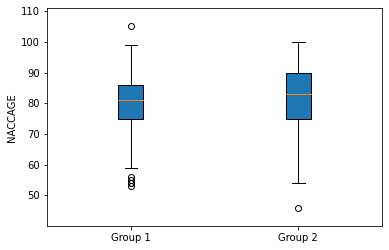

************************************************************************************************************************





Feature:  RACETER


--------------------------------------------------------------------------------
var_same LeveneResult(statistic=1.1848280541752085, pvalue=0.2771600795631978)
Test: f_t, p_value_t 1.472E+00 1.419E-01
ANOVA: f, p_value: 2.167E+00 1.419E-01
--------------------------------------------------------------------------------


Group1:  [88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 99 88 88 88 88 88 88 88
 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88
 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88
 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88
 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88
 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88
 88 88 88 99 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88
 88 88 88 8

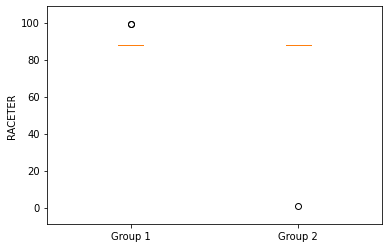

************************************************************************************************************************





Feature:  NACCIDEM


--------------------------------------------------------------------------------
var_same LeveneResult(statistic=0.8663639007546725, pvalue=0.3526361734661826)
Test: f_t, p_value_t 3.105E+00 2.065E-03
ANOVA: f, p_value: 9.641E+00 2.065E-03
--------------------------------------------------------------------------------


Group1:  [1 1 8 1 1 1 8 1 1 1 8 8 1 1 1 1 1 1 1 8 8 8 8 8 8 1 1 1 8 1 8 8 1 1 8 1 1
 1 8 1 8 1 1 1 1 8 1 8 8 8 1 1 1 8 8 8 1 8 1 1 1 1 1 8 8 8 1 8 1 1 1 1 1 8
 1 8 1 1 1 1 1 1 1 1 8 8 1 1 8 1 8 1 8 1 1 8 1 8 1 1 1 1 8 1 8 1 1 1 1 1 1
 8 1 1 1 8 8 1 1 8 1 1 8 1 8 1 1 1 8 1 1 8 1 1 1 1 8 1 1 1 1 8 1 1 8 1 1 8
 1 8 1 8 8 1 1 1 8 1 8 1 8 8 8 8 8 1 0 8 1 1 1 8 1 1 8 1 1 8 8 1 1 1 1 1 8
 8 1 8 1 8 1 1 1 1 1 8 1 8 1 8 1 1 1 1 1 1 8 1 1 1 8]


Group2:  [1 0 0 0 1 1 8 1 8 0 8 0 1 0 8 1 0 0 0 8 0 8 1 1 1 1 1 0 1 1 8 8 0 0 1 1 1
 1 8 8

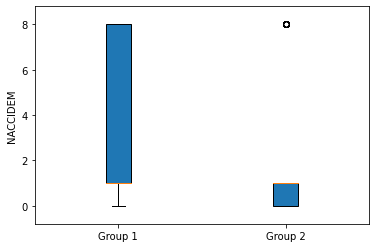

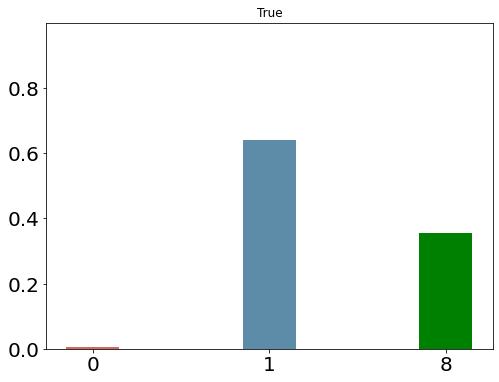

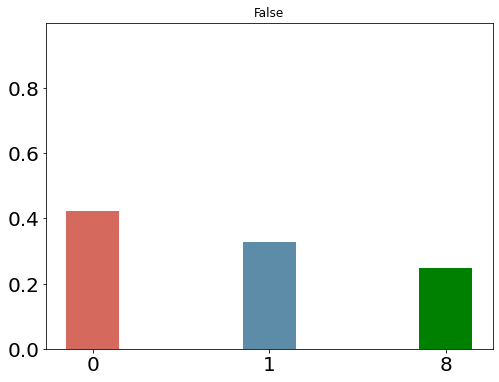

************************************************************************************************************************





Feature:  NACCAGEB


--------------------------------------------------------------------------------
var_same LeveneResult(statistic=0.8489608576217694, pvalue=0.35751151425058947)
Test: f_t, p_value_t -9.763E-01 3.296E-01
ANOVA: f, p_value: 9.532E-01 3.296E-01
--------------------------------------------------------------------------------


Group1:  [77 68 61 76 81 75 66 79 73 97 81 50 82 63 70 85 74 74 81 75 71 66 69 75
 64 85 89 79 74 64 70 75 76 93 73 83 88 86 61 86 65 83 86 69 88 58 76 60
 85 74 53 78 77 94 73 81 83 86 78 88 81 69 64 62 59 83 76 67 73 86 78 83
 86 83 86 76 81 81 88 90 84 76 81 77 81 57 66 81 79 77 78 74 77 74 70 50
 82 65 80 71 73 80 66 76 78 93 74 80 78 82 75 72 81 79 75 72 75 65 82 87
 69 73 71 79 66 73 79 84 83 87 74 77 87 85 85 70 77 67 80 81 79 65 76 72
 91 60 75 68 77 76 82 72 82 74 82 76 79 73 70 83 71 68 77 82 54 69 84 63
 95 82 8

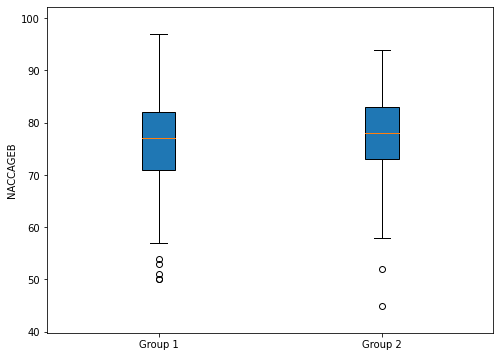

************************************************************************************************************************





Feature:  DECIN


--------------------------------------------------------------------------------
var_same LeveneResult(statistic=2.7678793623142695, pvalue=0.09711141913857642)
Test: f_t, p_value_t 1.036E-01 9.175E-01
ANOVA: f, p_value: 1.074E-02 9.175E-01
--------------------------------------------------------------------------------


Group1:  [1 0 1 1 1 9 0 1 1 0 1 1 1 1 1 1 1 1 1 9 1 1 9 1 1 1 1 1 9 1 1 0 1 1 1 1 1
 1 9 1 1 1 1 1 0 1 1 1 9 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 9 1 9 0 1 1 1 1 1 1 1 1 9 9 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


Group2:  [1 1 8 1 1 1 9 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 9 1 1 1 1 1
 1 9 1 0

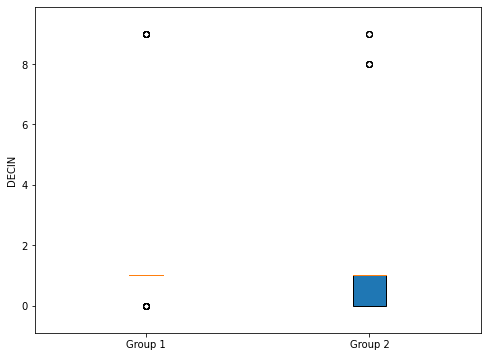

************************************************************************************************************************





Feature:  COMMUN


--------------------------------------------------------------------------------
var_same LeveneResult(statistic=8.947821092862739, pvalue=0.0029845582300037188)
Test: f_t, p_value_t 1.393E+01 9.325E-33
ANOVA: f, p_value: 2.040E+02 9.325E-33
--------------------------------------------------------------------------------


Group1:  [1.0 2.0 1.0 1.0 1.0 1.0 1.0 1.0 0.5 1.0 1.0 1.0 1.0 1.0 0.5 0.5 1.0 1.0
 1.0 1.0 1.0 1.0 0.5 1.0 0.5 1.0 1.0 0.5 1.0 0.5 1.0 1.0 2.0 1.0 1.0 1.0
 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 2.0 1.0 1.0 0.5 1.0 2.0
 0.5 1.0 1.0 2.0 2.0 0.5 1.0 2.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 0.0 1.0
 1.0 1.0 0.5 2.0 0.5 1.0 1.0 1.0 1.0 0.5 1.0 0.5 1.0 1.0 1.0 1.0 1.0 2.0
 1.0 1.0 0.5 1.0 1.0 1.0 0.5 1.0 1.0 1.0 0.0 1.0 1.0 1.0 1.0 1.0 1.0 0.5
 1.0 1.0 1.0 1.0 0.5 2.0 0.5 1.0 2.0 1.0 1.0 1.0 0.5 1.0 2.0 1.0 0.5 1.0
 1.0 1.0 1

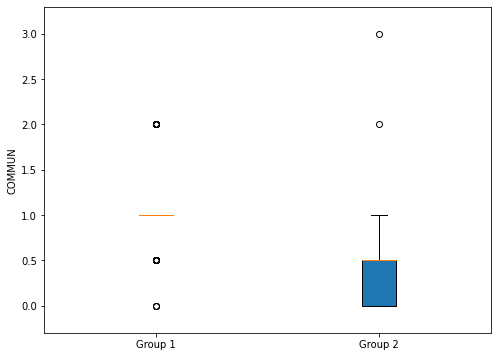

************************************************************************************************************************





Feature:  NPPDXE


--------------------------------------------------------------------------------
var_same LeveneResult(statistic=1.4278601965591255, pvalue=0.23296177459131154)
Test: f_t, p_value_t -1.195E+00 2.330E-01
ANOVA: f, p_value: 1.428E+00 2.330E-01
--------------------------------------------------------------------------------


Group1:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


Group2:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0

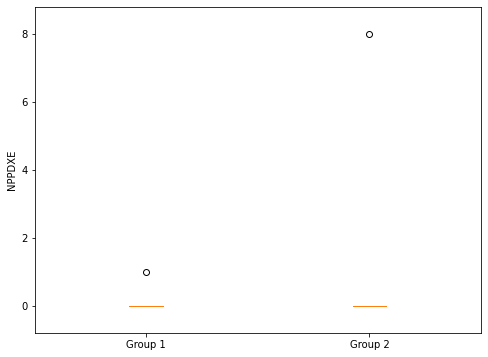

************************************************************************************************************************





Feature:  MARISTAT


--------------------------------------------------------------------------------
var_same LeveneResult(statistic=1.529030462482723, pvalue=0.21712681740959403)
Test: f_t, p_value_t -1.237E+00 2.171E-01
ANOVA: f, p_value: 1.529E+00 2.171E-01
--------------------------------------------------------------------------------


Group1:  [6 1 1 2 1 3 3 1 1 2 1 1 1 1 1 2 2 1 1 1 3 2 1 1 3 2 3 1 3 1 1 1 2 5 1 1 1
 2 1 1 1 1 2 1 5 1 3 1 2 1 1 1 1 2 1 1 1 3 1 2 1 5 1 1 1 3 1 6 1 2 1 3 2 2
 1 2 2 1 2 1 2 9 1 2 1 6 1 1 1 2 1 1 1 1 1 1 1 3 1 1 2 1 5 5 1 2 1 1 3 1 2
 1 2 1 1 1 3 1 1 2 1 1 1 1 1 1 1 2 1 2 1 1 1 6 2 1 2 1 2 3 1 1 2 1 2 1 1 1
 2 1 1 2 1 2 6 1 2 1 1 2 1 2 1 1 1 1 1 1 2 2 2 1 1 3 2 2 1 1 1 1 1 2 1 1 1
 1 2 5 2 1 1 2 2 2 3 1 1 1 1 1 1 2 5 1 3 1 1 1 1 1 5]


Group2:  [5 2 2 5 1 1 1 1 2 1 3 6 1 3 3 3 1 1 1 1 2 1 3 2 1 3 1 1 1 3 2 2 2 2 1 1 1
 1 3 

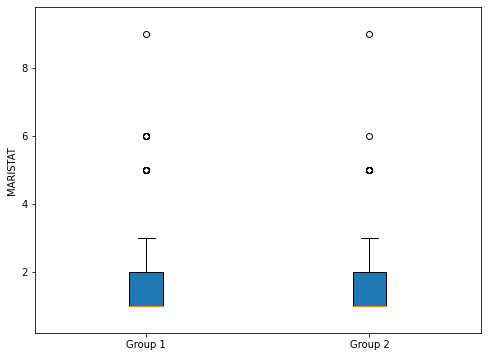

************************************************************************************************************************





Feature:  ORIENT


--------------------------------------------------------------------------------
var_same LeveneResult(statistic=6.51457740472654, pvalue=0.011143907907713961)
Test: f_t, p_value_t 1.458E+01 2.355E-36
ANOVA: f, p_value: 2.006E+02 2.355E-36
--------------------------------------------------------------------------------


Group1:  [1.0 2.0 1.0 1.0 1.0 0.5 0.0 1.0 1.0 1.0 1.0 1.0 2.0 1.0 1.0 1.0 2.0 1.0
 1.0 1.0 1.0 1.0 1.0 1.0 1.0 0.5 2.0 1.0 1.0 1.0 1.0 1.0 0.0 1.0 0.5 1.0
 1.0 1.0 1.0 0.5 1.0 0.0 0.5 0.5 1.0 1.0 1.0 1.0 1.0 1.0 0.5 1.0 2.0 1.0
 1.0 0.5 0.5 1.0 1.0 1.0 0.5 0.5 0.5 0.5 1.0 1.0 1.0 1.0 1.0 1.0 2.0 0.5
 1.0 1.0 0.5 0.5 1.0 1.0 0.5 1.0 2.0 1.0 1.0 0.5 1.0 1.0 1.0 1.0 1.0 1.0
 1.0 1.0 1.0 1.0 1.0 0.0 1.0 1.0 0.5 0.5 1.0 1.0 1.0 2.0 1.0 1.0 2.0 0.5
 0.5 0.0 1.0 1.0 1.0 2.0 1.0 1.0 0.5 0.5 1.0 1.0 1.0 1.0 1.0 1.0 2.0 1.0
 2.0 0.5 1.0

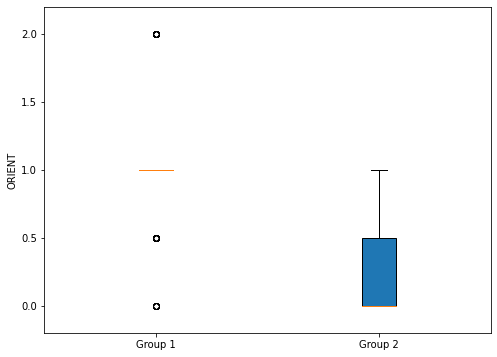

************************************************************************************************************************





Feature:  NACCPPA


--------------------------------------------------------------------------------
var_same LeveneResult(statistic=109.34095956351956, pvalue=2.513588607224886e-22)
Test: f_t, p_value_t -8.135E+00 3.196E-13
ANOVA: f, p_value: 1.093E+02 3.196E-13
--------------------------------------------------------------------------------


Group1:  [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 7 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


Group2:  [7 0 8 0 0 0 0 0 0 0 0 7 0 8 1 0 7 0 0 0 7 0 0 0 0 7 0 7 0 0 0 0 7 7 0 0 0
 0 

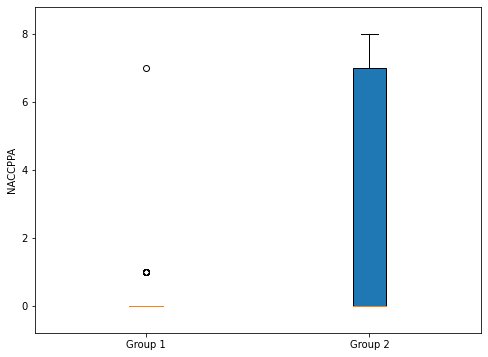

************************************************************************************************************************







In [5]:
group1_index=np.where(data_arr[:,-1]==True)[0]
group2_index=np.where(data_arr[:,-1]==False)[0]

for i in np.arange(used_number_features):
    feature_name=FS_data_used[i]
    
    print("Feature: ",feature_name)
    
    
    index_i=np.where(column_names_arr==feature_name)[0][0]
    get_data_i=data_arr[:,index_i]
    
    group1_data=get_data_i[group1_index]
    group2_data=get_data_i[group2_index]
    
    statistic_analysis(group1_data, group2_data)
    
    print("Group1: ",group1_data)
    print("\n")
    print("Group2: ",group2_data)
    print("\n")
    print("Mean: ",np.mean(group1_data),np.mean(group2_data))
    print("Std: ",np.std(group1_data),np.std(group2_data))
    
    bar_figure(group1_data,group2_data,feature_name)
    
    if feature_name=='NACCIDEM':
        draw_bar(group1_data,'True')
        draw_bar(group2_data,'False')
            
    
    print("*"*120)
    print("\n\n\n")
    
    
    print()